# Exploring Video Game Sales

This dataset contains a list of video games with sales greater than 100,000 copies.

In this project I will deal only with exploratory analysis, where the objective is to understand how the data is distributed and generate insight for future decision-making, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from 1980 to 2016.


### Data information : 
Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [2]:
data = pd.read_csv('C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\Video_game_sales_analysis\\data\\vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Check for null values

In [4]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
data[data['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


## Put median values in Year null values. 

In [6]:
data.groupby('Platform')['Year'].median()

Platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2009.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: Year, dtype: float64

In [7]:
data['Year'] = data['Year'].fillna(data.groupby('Platform')['Year'].transform('median').apply(lambda x: np.floor(x)))

In [8]:
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [9]:
data[data['Publisher'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,1998.0,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,2011.0,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [10]:
data['Publisher'].unique

<bound method Series.unique of 0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16598, dtype: object>

In [11]:
data.dropna(inplace=True)
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
data['Year']=data['Year'].astype(int)

In [13]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [14]:
data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [15]:
validation = pd.DataFrame(data.groupby(['Name','Platform', 'Year'])['Name'].count())
validation

,,,Name
Name,Platform,Year,
'98 Koshien,PS,1998,1
.hack//G.U. Vol.1//Rebirth,PS2,2006,1
.hack//G.U. Vol.2//Reminisce,PS2,2006,1
.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,1
.hack//G.U. Vol.3//Redemption,PS2,2007,1
...,...,...,...
thinkSMART: Chess for Kids,DS,2011,1
uDraw Studio,Wii,2010,1
uDraw Studio: Instant Artist,Wii,2011,1


In [16]:
validation [validation['Name'] > 1]

,,,Name
Name,Platform,Year,
Madden NFL 13,PS3,2012,2
Wii de Asobu: Metroid Prime,Wii,2009,2


In [17]:
data[data['Name'] == 'Wii de Asobu: Metroid Prime']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,15000,Wii de Asobu: Metroid Prime,Wii,2009,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,2009,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [18]:
data.drop_duplicates(subset = ['Name','Platform','Year'], inplace=True)

In [19]:
validation = pd.DataFrame(data.groupby(['Name','Platform', 'Year'])['Name'].count())
validation [validation['Name'] > 1]

,,,Name
Name,Platform,Year,


## What genre games have been made the most?


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


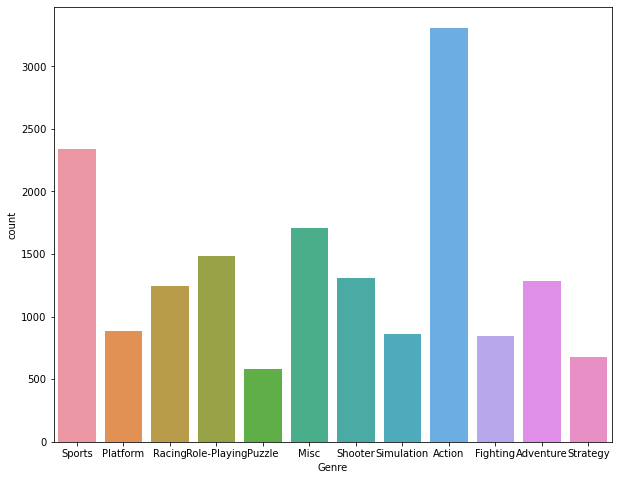

In [20]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data['Genre'])
plt.show()

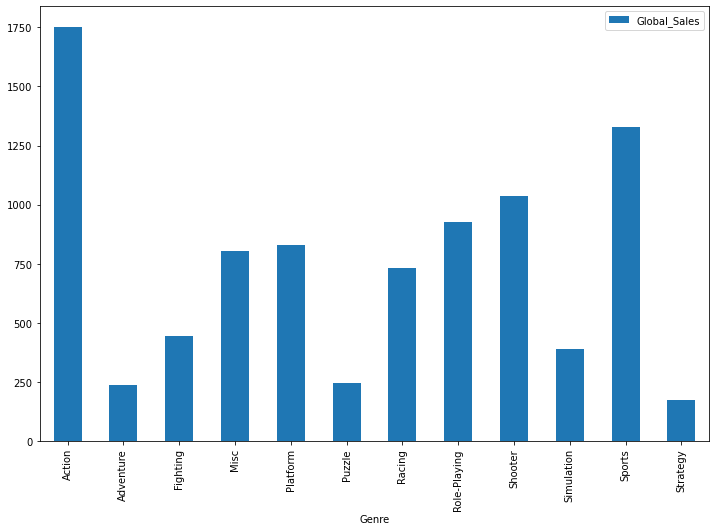

In [21]:
data.pivot_table(index='Genre',values='Global_Sales', aggfunc='sum').plot(kind='bar', figsize=(12,8))
plt.show()

In [22]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

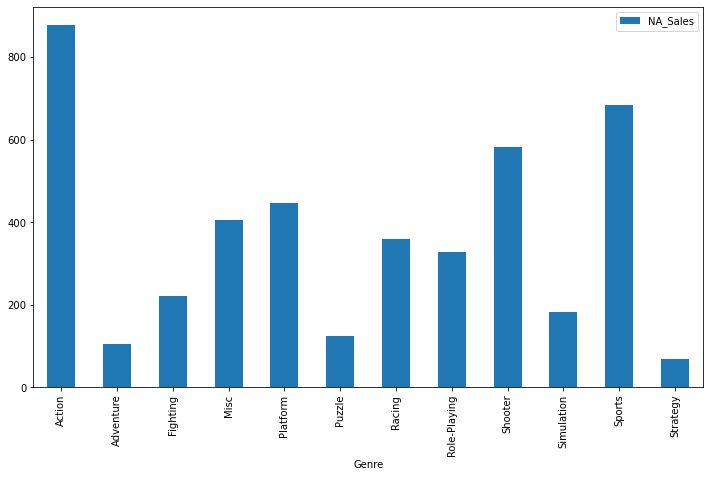

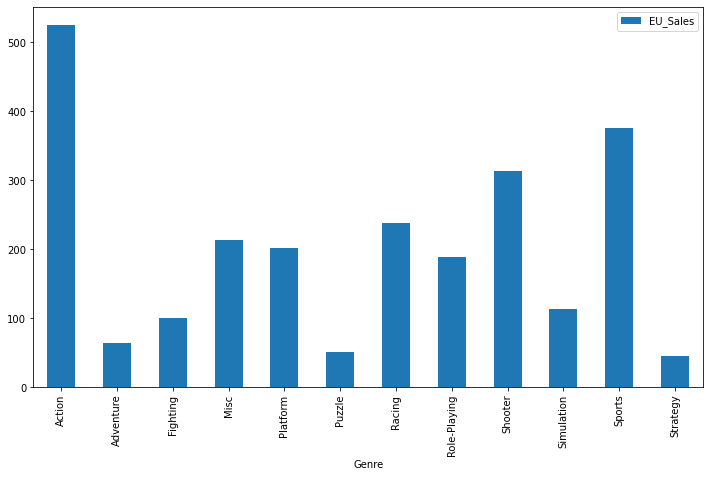

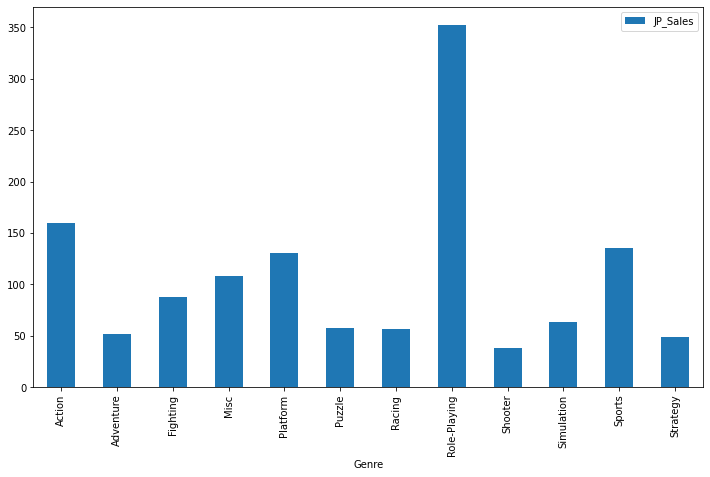

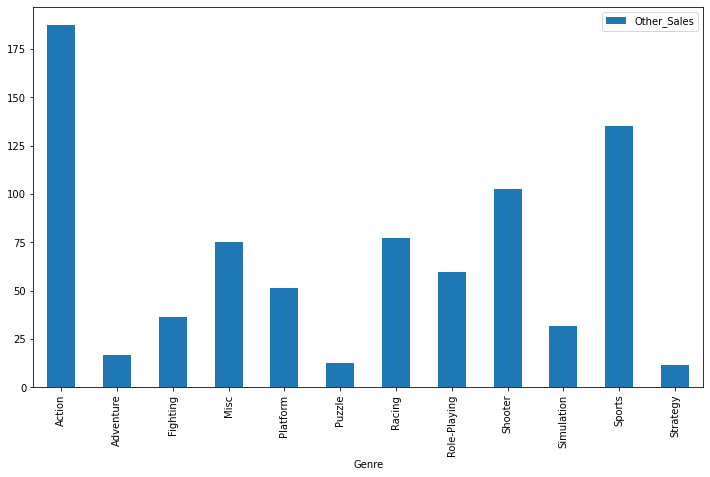

In [23]:
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    data.pivot_table(index='Genre', values = region, aggfunc='sum').plot(kind='bar', figsize=(12,7))
    plt.show()

<AxesSubplot:xlabel='Year'>

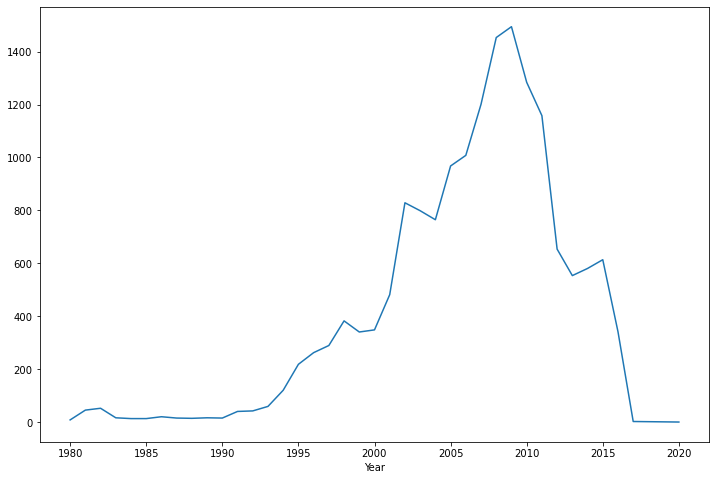

In [24]:
data.groupby('Year')['Name'].count().plot(kind='line', figsize=(12,8))

In [25]:
data.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [26]:
sales_data = data.pivot_table(index='Name', aggfunc='sum', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
sales_data.sort_values('Global_Sales', ascending=True)

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Name,,,,,
Irotoridori no Sekai: World's End Re-Birth,0.00,0.01,0.01,0.00,0.00
Shin Koihime Musou: Otome Taisen * Sangokushi Engi,0.00,0.01,0.01,0.00,0.00
E.T. The Extra-Terrestrial,0.00,0.01,0.00,0.01,0.00
Vanark,0.01,0.01,0.00,0.01,0.00
Mortal Kombat: Tournament Edition,0.00,0.01,0.00,0.01,0.00
...,...,...,...,...,...
Mario Kart Wii,12.88,35.82,3.79,15.85,3.31
Tetris,2.95,35.84,6.03,26.17,0.69
Super Mario Bros.,4.88,45.31,6.96,32.48,0.99


# top 10 publishers regionwise and globally

In [36]:
publisher_name= data.pivot_table(index='Publisher',aggfunc='sum',values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
publisher_name.sort_values('Global_Sales',ascending=False)

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Publisher,,,,,
Nintendo,418.74,1786.54,455.40,816.87,95.33
Electronic Arts,371.26,1110.31,14.04,595.07,129.77
Activision,215.53,727.46,6.54,429.70,75.34
Sony Computer Entertainment,187.72,607.50,74.10,265.22,80.45
Ubisoft,163.32,474.72,7.50,253.43,50.26
...,...,...,...,...,...
Ongakukan,0.00,0.01,0.01,0.00,0.00
Commseed,0.00,0.01,0.01,0.00,0.00
Takuyo,0.00,0.01,0.01,0.00,0.00


## Correlatation sales btw Japan and North America

In [37]:
sales_data['NA_Sales'].corr(sales_data['JP_Sales'])

0.40598340537493305

In [38]:
publisher_name['NA_Sales'].corr(publisher_name['JP_Sales'])

0.7063272567842287

In [40]:
publisher_name['JP_Sales'].corr(publisher_name['NA_Sales'])

0.7063272567842287

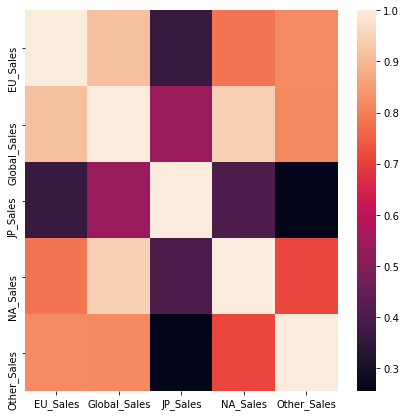

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(sales_data.corr())
plt.show()

## Publisher sales treadline


In [61]:
yearwise_sales = pd.DataFrame(data[data['Publisher'].isin(['Nintendo', 'Electronic Arts', 'Activision'])].groupby(['Publisher','Year'])['Global_Sales'].sum())
yearwise_sales.reset_index(inplace=True)

In [62]:
yearwise_sales

,Publisher,Year,Global_Sales
0,Activision,1980,3.02
1,Activision,1981,8.50
2,Activision,1982,2.90
3,Activision,1983,1.94
4,Activision,1984,0.27
...,...,...,...
85,Nintendo,2012,56.47
86,Nintendo,2013,52.79
87,Nintendo,2014,48.65
88,Nintendo,2015,27.08


In [64]:
yearwise_sales.head()

,Publisher,Year,Global_Sales
0,Activision,1980,3.02
1,Activision,1981,8.50
2,Activision,1982,2.90
3,Activision,1983,1.94
4,Activision,1984,0.27


## Which year had the most game releases?

Replicate from the previous code

In [6]:
data['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

## What are the top game genres produced for the years(5) with maximum game production?

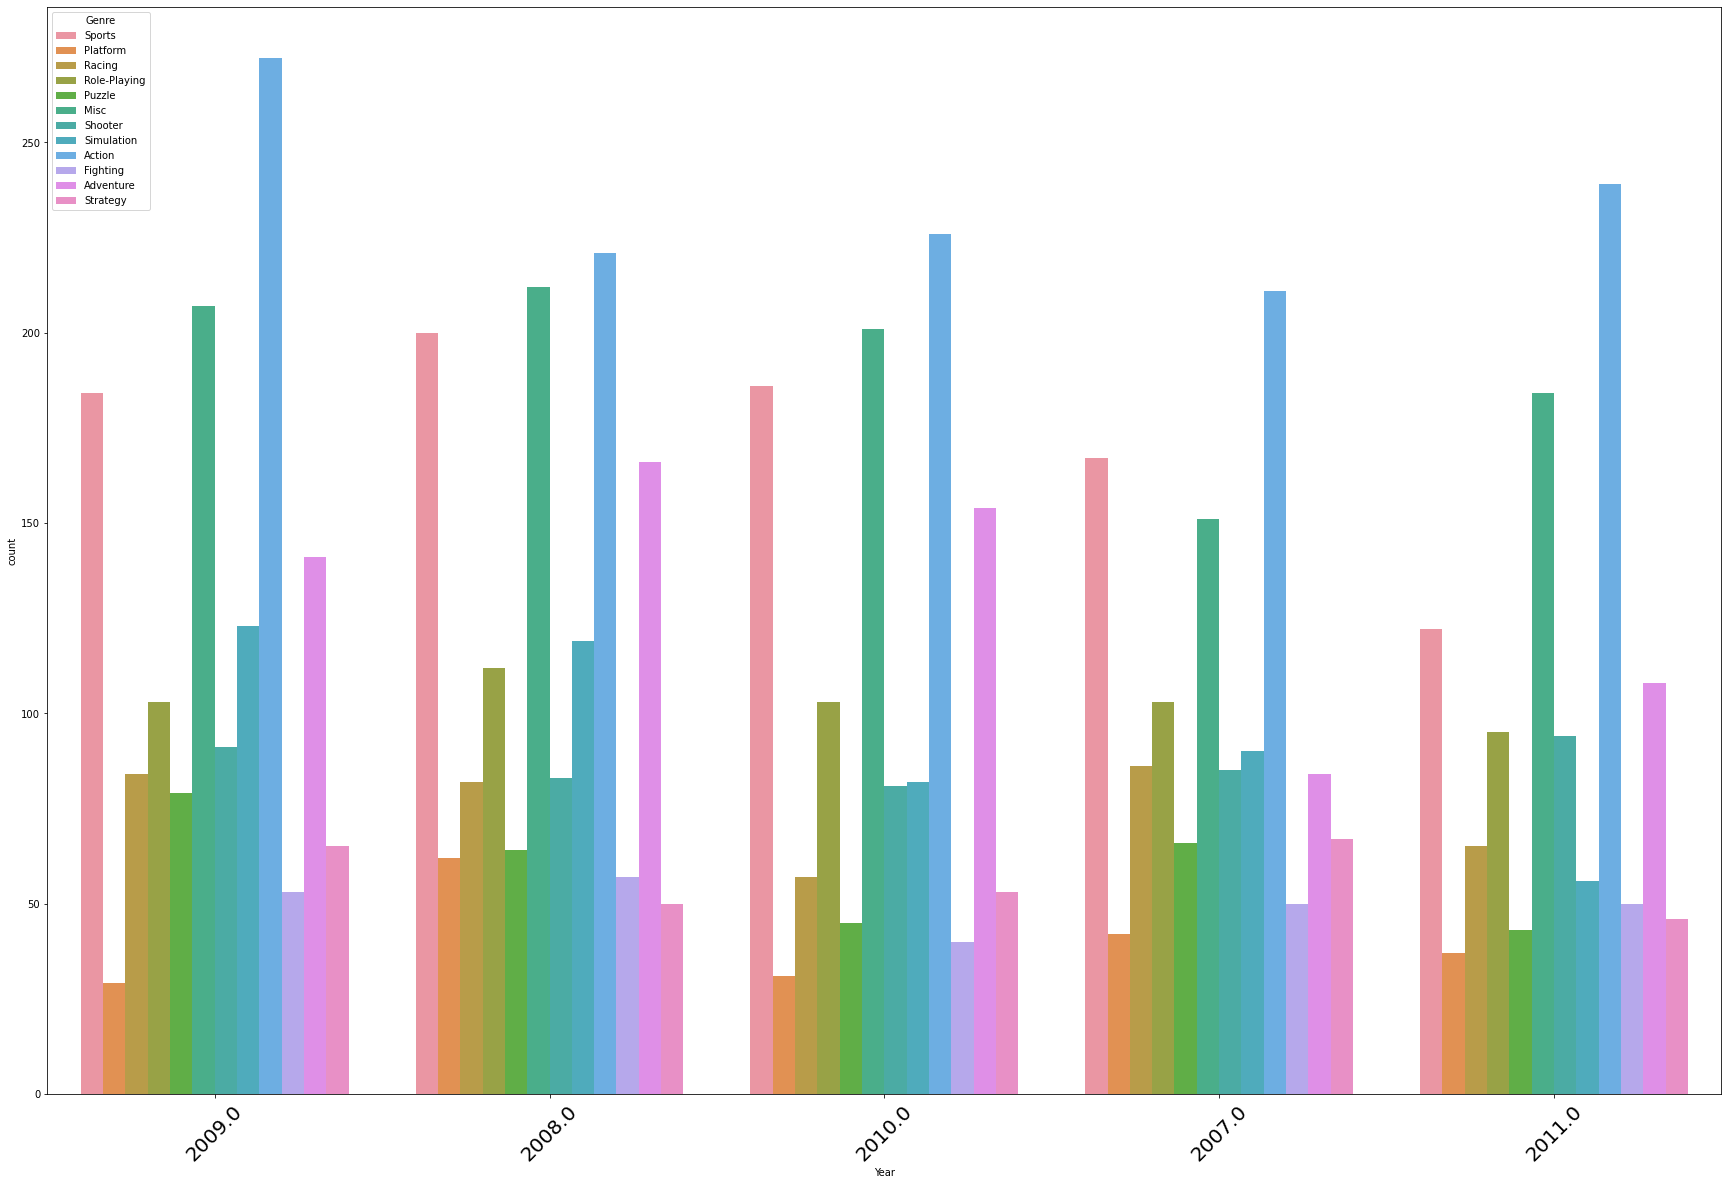

In [7]:
plt.figure(figsize=(30,20))
order = data.Year.value_counts().iloc[:5].index
sns.countplot(x='Year', data=data, hue='Genre', order = order)
plt.xticks(size=20,rotation=45)
plt.show()

## Which genre game has sold the most in a single year?



In [8]:
data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [16]:
YSD = data.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index
YSD

<bound method Series.reset_index of Year    Genre       
1980.0  Action           0.34
        Fighting         0.77
        Misc             2.71
        Shooter          7.07
        Sports           0.49
                        ...  
2016.0  Sports          14.60
        Strategy         0.50
2017.0  Action           0.01
        Role-Playing     0.04
2020.0  Simulation       0.29
Name: Global_Sales, Length: 389, dtype: float64>

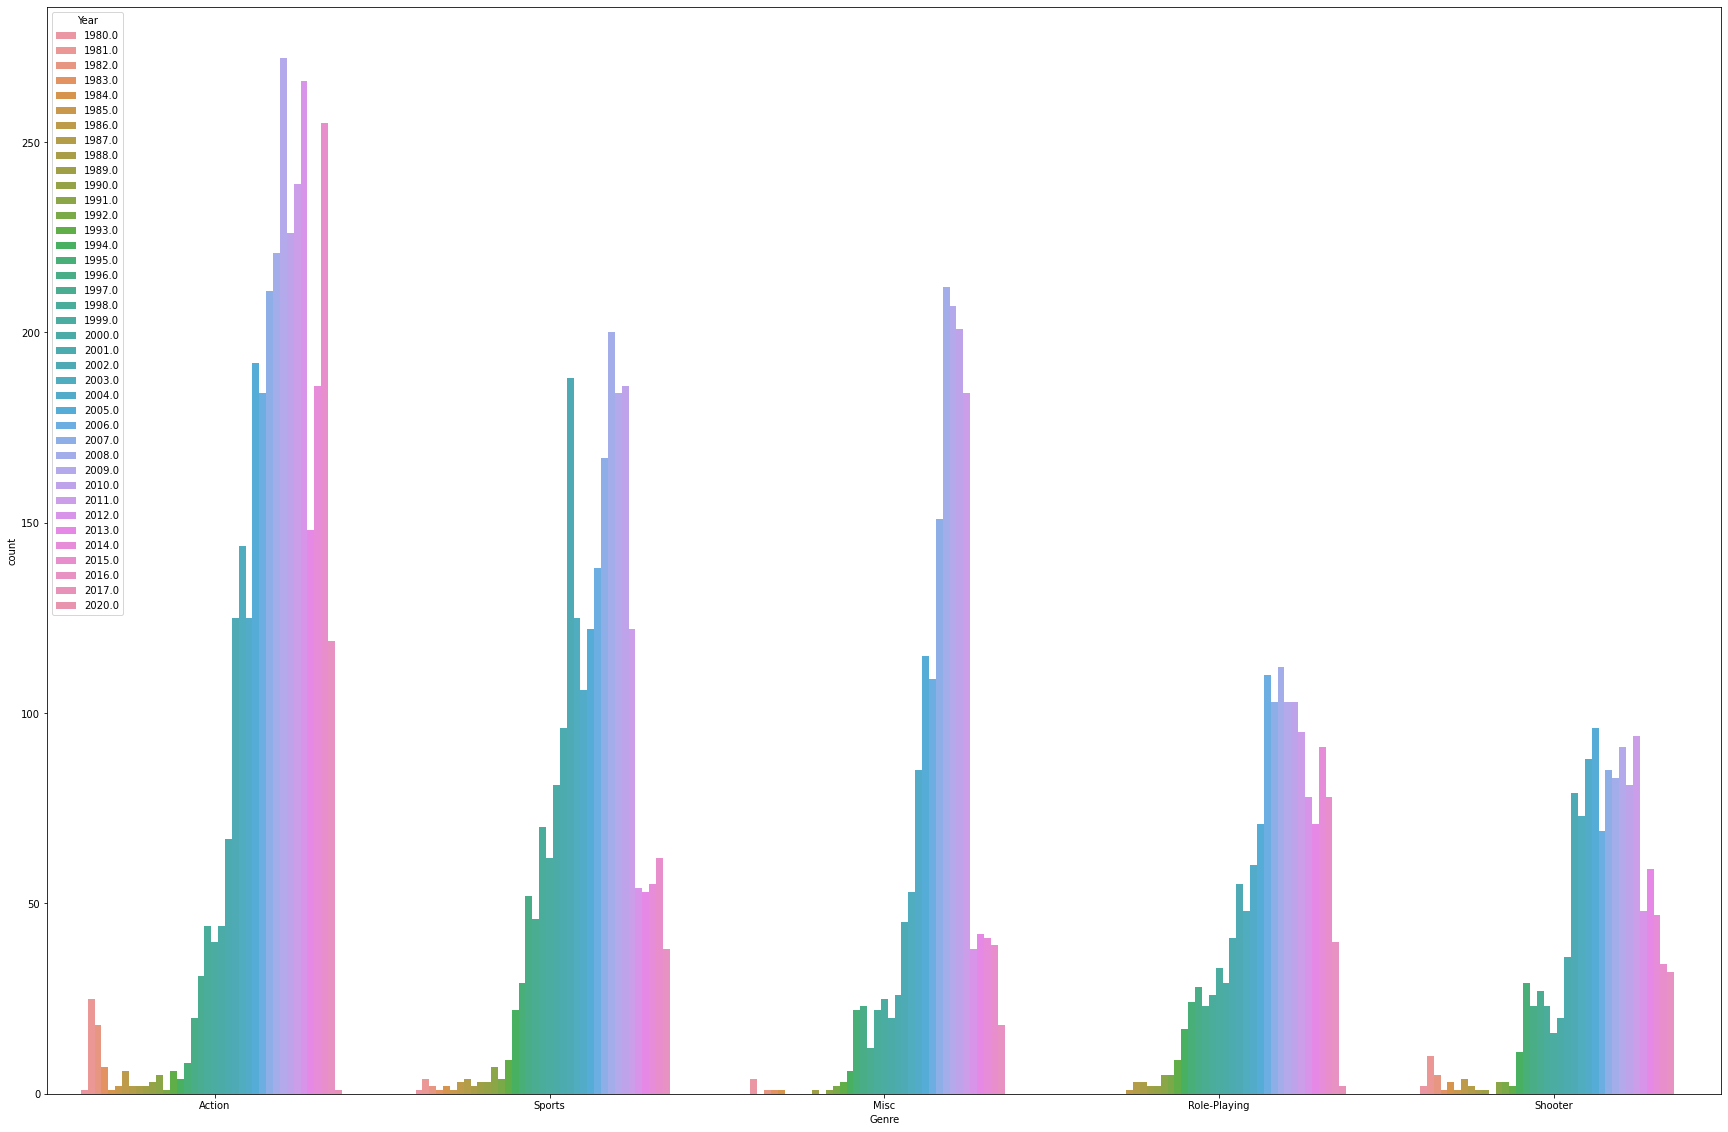

In [10]:
plt.figure(figsize=(30,20))
ss= data.Genre.value_counts().iloc[:5].index
sns.countplot(x='Genre',data=data, hue='Year', order=ss)
plt.show()

## Which platfrom have the highest sale price globally?

In [17]:
data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


<AxesSubplot:xlabel='Platform'>

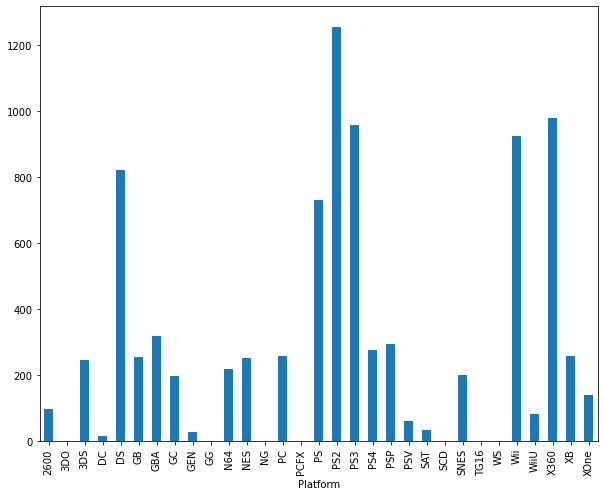

In [34]:
PS = data.groupby('Platform')['Global_Sales'].sum()
PS.plot(kind='bar',stacked=False, figsize=(10,8))

In [ ]:
PS = data.groupby('Platform')['Global_Sales'].sum()
plt.figure(figsize=(10,8))
sns.barplot(x="Platform", y="Global_Sales",data=PS)

##  Which individual game have the highest sale price globally?

## Find the total revenue by region


## What other questions you would want to get answered?

## What useful insights would you like to take to the stakeholders planning to come up with a new game?

## Take away activity : Understand the data more, complete the analysis keeping in mind the above business stakeholder question or any other and share your notebook on slack
